# Machine Learning®

<img src="images/ai.jpeg" style="width:500px;length:500px">

What is Machine Learning?
<img src="images/ml-1.png" style="width:600px;height:600px">

<img src="images/ml-3.jpeg" style="width:500px;height:500px">

<b>Supervised Machine Learning</b>
<img src="images/sup-1.png" style="width:600px;height:600px">

<img src="images/sup-2.png" style="width:600px;height:600px">

# SuperVised Machine Learning 

<img src="images/superexs.webp">

In [142]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,mean_squared_error,r2_score
from sklearn.datasets import make_blobs,make_regression
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt

## Classifications


https://machinelearningmastery.com/types-of-classification-in-machine-learning/

In [122]:
irises = load_iris()
print(irises.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [123]:
df = pd.DataFrame(irises.data,
             columns=irises.feature_names)
df['species'] = irises.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolour', 2: 'virginica'})

In [124]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [125]:
X = df[['petal length (cm)']]
y = df['species_name']

In Machine Learning: 

<b>Input Data</b> = Independent Variables = Features  ->    There can be from 1 to 100,000<p>
<b>Target Data </b> = Depdendent Variable  = Predictant. -> Usually only 1

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [127]:
# Fit the model just on the training set.
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [128]:
# Accuracy of model on the training data 
# Accuracy = # correct / total # 

knn2.score(X_train, y_train)

0.9464285714285714

In [129]:
## Check scores for Test Data 
knn2.score(X_test, y_test)

0.9736842105263158

In [130]:
## Create Train predictions
y_train_pred = knn2.predict(X_train)

## Create Test Predictions
y_test_pred = knn2.predict(X_test)

Confusion Matrix 
https://machinelearningmastery.com/confusion-matrix-machine-learning/

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

/Users/joecomeausx/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


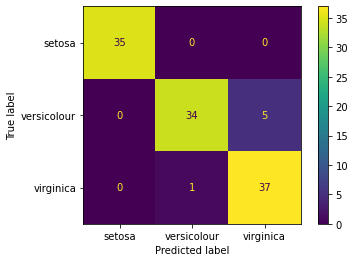

In [131]:
# tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(knn2,X_train,y_train)

Text(0, 0.5, 'sepal length')

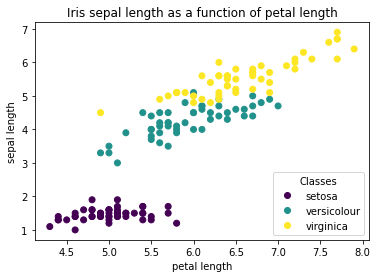

In [132]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=df['sepal length (cm)'],
           y=df['petal length (cm)'],
           c=df['species'])
labs = df["species_name"].unique()

handles, labels = scatter.legend_elements()
# *scatter.legend_elements(),
legend1 = ax.legend(handles,labs,
                    loc="lower right", title="Classes")

ax.set_title('Iris sepal length as a function of petal length')
ax.set_xlabel('petal length')
ax.set_ylabel('sepal length')
#ax.legend();

## Lets Creates our Own Data so We Can Play Around

make_blobs :  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [133]:
X,y = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=6.0,random_state=42)
X1 = X[:,[0]]
X2 = X[:,[1]]


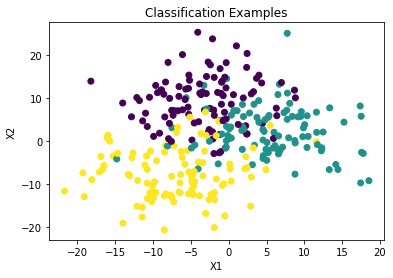

In [134]:
def plotData(X1,X2,y):

    fig, ax = plt.subplots()

    scatter = ax.scatter(x=X1,
               y=X2,
               c=y)

    ax.set_title('Classification Examples')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
plotData(X1,X2,y)

KNeighborsClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<p>
test_train_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Train Score: 0.88
Test Score: 0.84


/Users/joecomeausx/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/joecomeausx/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


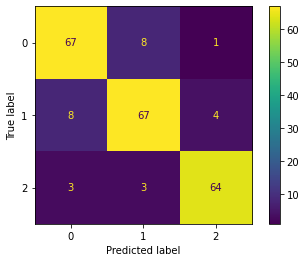

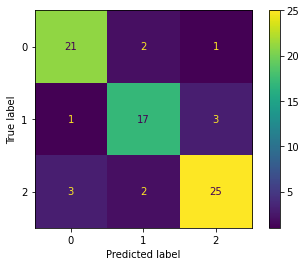

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train, y_train)
train_score = knn2.score(X_train, y_train)
test_score = knn2.score(X_test, y_test)
plot_confusion_matrix(knn2,X_train,y_train)
plot_confusion_matrix(knn2,X_test,y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Over Fitting vs Underfitting 

Over Fitting  Train_Score > Test_Score
Under Fitting Test_Score > Train_Score

Desired Fitting.   Train_Score ~= Test_Score

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

<img src="images/overfitting_2.png">

<img src="images/overfitting_1.jpeg">

Let's Improve our Ability to Run ML Models More Easily
<p>
Create a Function that does much of the work for us

/Users/joecomeausx/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/joecomeausx/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train Score: 0.88
Test Score: 0.84


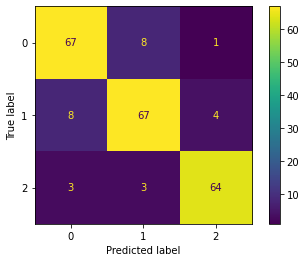

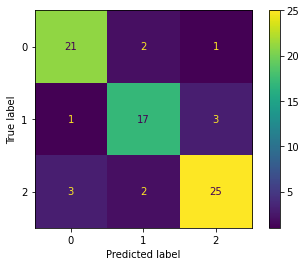

In [136]:
def runModel(model,X,y,conf):
# Split Data into Test and Train 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
# Fit Model 
    model.fit(X_train, y_train)
    
# Get Scores 
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

# Get Confusion Matrix IF Wanted
    if (conf == True):
        plot_confusion_matrix(model,X_train,y_train)
        plot_confusion_matrix(model,X_test,y_test)

    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")
    
    
runModel(knn2,X,y,True)

In [24]:
# Support Vector  Machine Ms)%20are,than%20the%20number%20of%20samples.
svc = svm.SVC(kernel="rbf",gamma=.7)
runModel(svc,X,y,False)

svc = svm.SVC(kernel="linear",gamma=.7)
runModel(svc,X,y,False)

svc = svm.SVC(kernel="poly",gamma=.7)
runModel(svc,X,y,False)https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.

Train Score: 0.96
Test Score: 0.72
Train Score: 0.8177777777777778
Test Score: 0.8266666666666667
Train Score: 0.7911111111111111
Test Score: 0.7733333333333333


Support Vector Machine : https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SV

Train Score: 1.0
Test Score: 0.7733333333333333


C:\Users\CoJoe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\CoJoe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


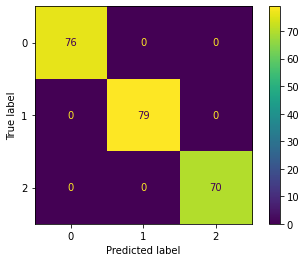

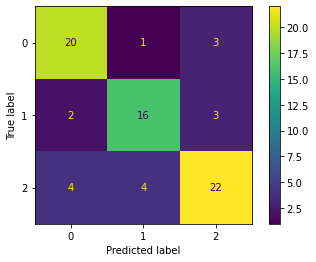

In [27]:
dTree = tree.DecisionTreeClassifier()
runModel(dTree,X,y,True)

Decision Tree https://scikit-learn.org/stable/modules/tree.html

Sklearn Supervised Learning Models - https://scikit-learn.org/stable/supervised_learning.html

## Regression 

Because we have chosen a *continuous* variable as our target, our resulting modeling problem is a **regression** problem. One exceedingly common algorithm for regression problems is the celebrated algorithm of **linear regression**.

The idea here is simple: Model the target as a linear transformation of your predictors. If we're using only petal length as our predictor of sepal length, then we can express this model as:

$y = \beta_1 x + \beta_0$.

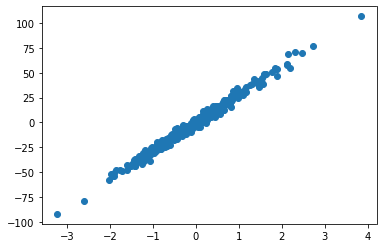

In [173]:
X,y = make_regression(n_samples=300,n_features=1,random_state=42,noise=3.)

plt.scatter(X[:,[0]],y)


Linear Regression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<p>
    
make_regression - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
<p>
    
MERTICS - https://scikit-learn.org/stable/modules/model_evaluation.html

In [141]:
# set up Linear Regression Model 
lr = LinearRegression()

# Train the model
lr.fit(X, y)
y_pred = lr.predict(X)
# Now extract the optimizing coefficients
lr.intercept_, lr.coef_

# Compute some Metrics 
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

rmse = math.sqrt(mse)
print(r2,rmse)

0.9382475738210804 7.090303568654928


Metrics -> So many options, what to use? 
<table><tr><td><img src="images/mse.png"></td><td><img src="images/rmse.png"></td></tr></table>

How many processes in the Real World are Linear?
<p>
Polynomial Regressions

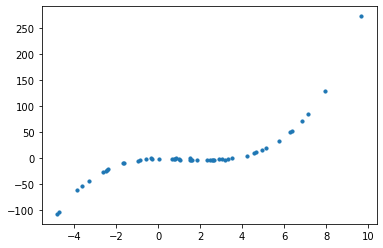

In [174]:
def genPoly(n,noise):
    np.random.seed(0)
    x = 2 - 3 * np.random.normal(0, 1, n)
    y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-(2**noise), 2**noise, n)
    X = []
    for val in x:
        tmp = []
        tmp.append(val)
        X.append(tmp)
    
    return (np.array(X),y)
X,y = genPoly(50,0)
plt.scatter(X,y, s=10)


In [157]:
lr = LinearRegression()

# Train the model
lr.fit(X, y)
y_pred = lr.predict(X)
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

rmse = math.sqrt(mse)
print(r2,rmse)

0.6559373723811306 31.509007535476716


In [171]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1,1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

mse = mean_squared_error(y,y_predicted)
r2 = r2_score(y,y_predicted)

rmse = math.sqrt(mse)
print(r2,rmse)

0.9997417255763146 0.863289927472401


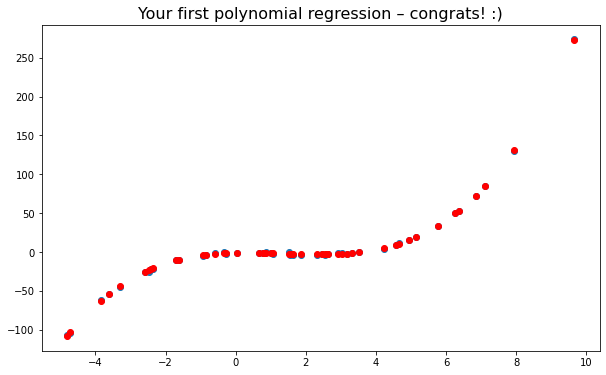

In [172]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(X, y)
plt.scatter(X, y_predicted, c="red")
plt.show()

PolynomialFeatures - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
<p>
    https://data36.com/polynomial-regression-python-scikit-learn/

<img src="images/fun.jpeg" style="width:500px;height:500px">